In [1]:
import numpy as np
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Iris.csv')


In [3]:
dataset.shape

(150, 6)

In [4]:
dataset.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
dataset.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [7]:
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = dataset[feature_columns].values
y = dataset['Species'].values

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

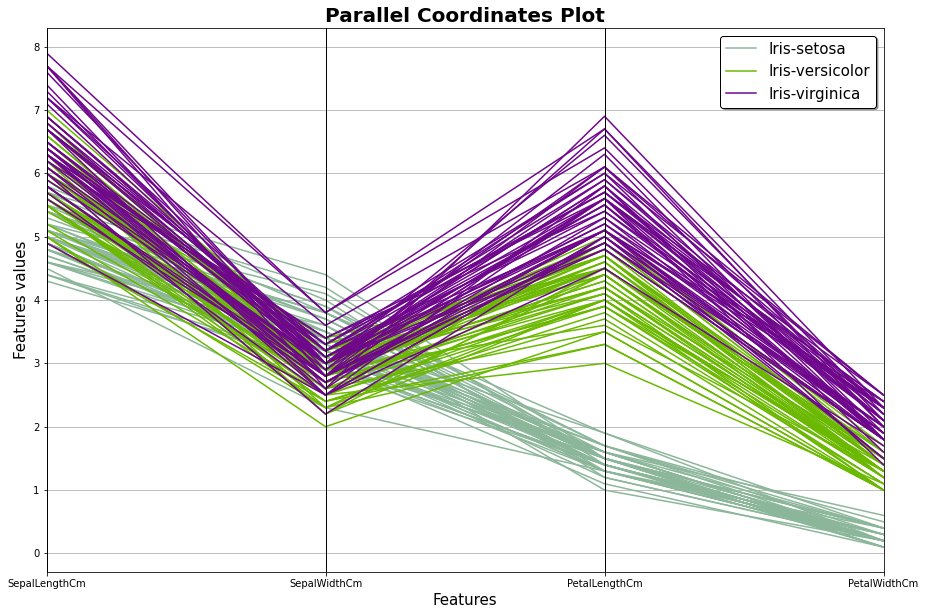

In [11]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
parallel_coordinates(dataset.drop("Id", axis=1), "Species")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()


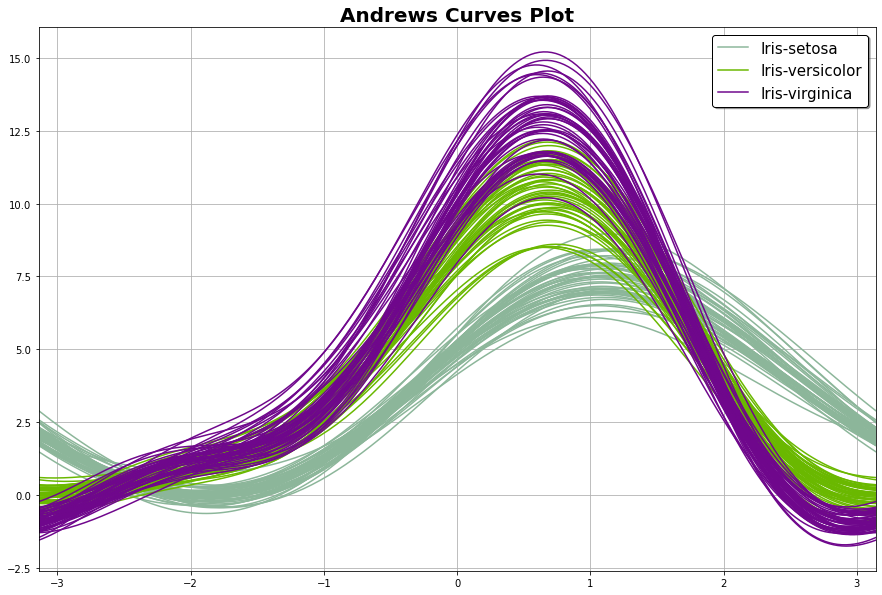

In [12]:
from pandas.plotting import andrews_curves
plt.figure(figsize=(15,10))
andrews_curves(dataset.drop("Id", axis=1), "Species")
plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()


C:\Users\sharo\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

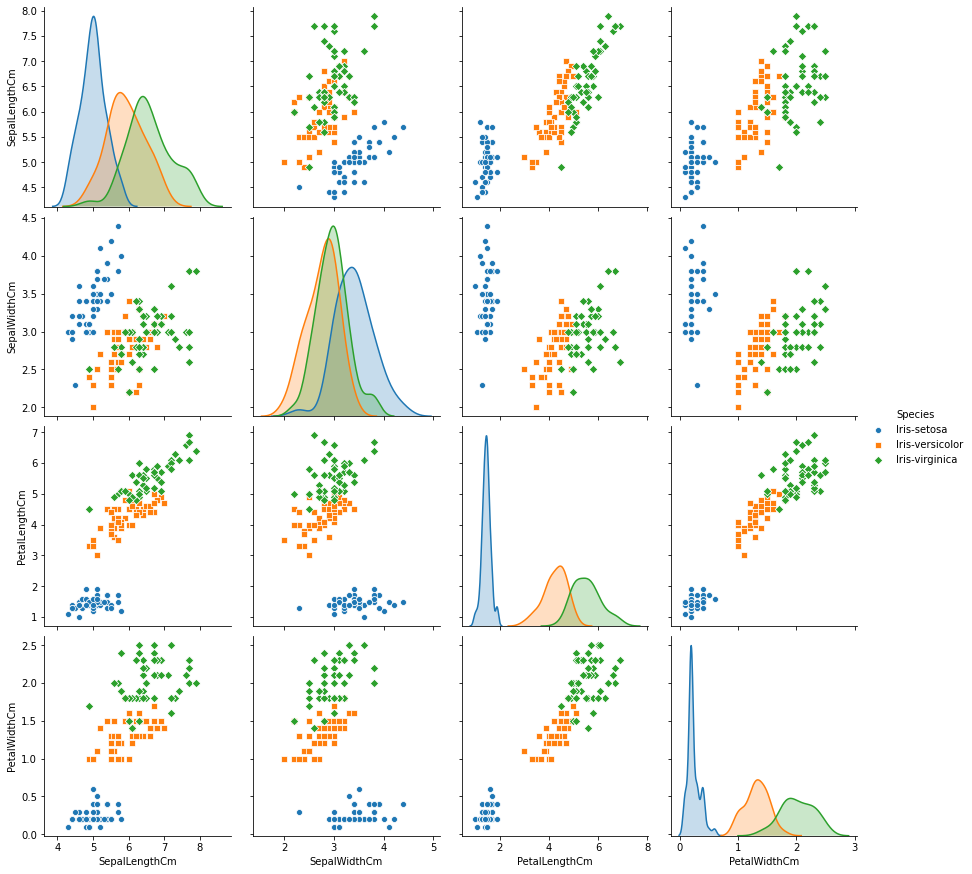

In [13]:
plt.figure()
sns.pairplot(dataset.drop("Id", axis=1), hue = "Species", size=3, markers=["o", "s", "D"])
plt.show()

<Figure size 432x288 with 0 Axes>

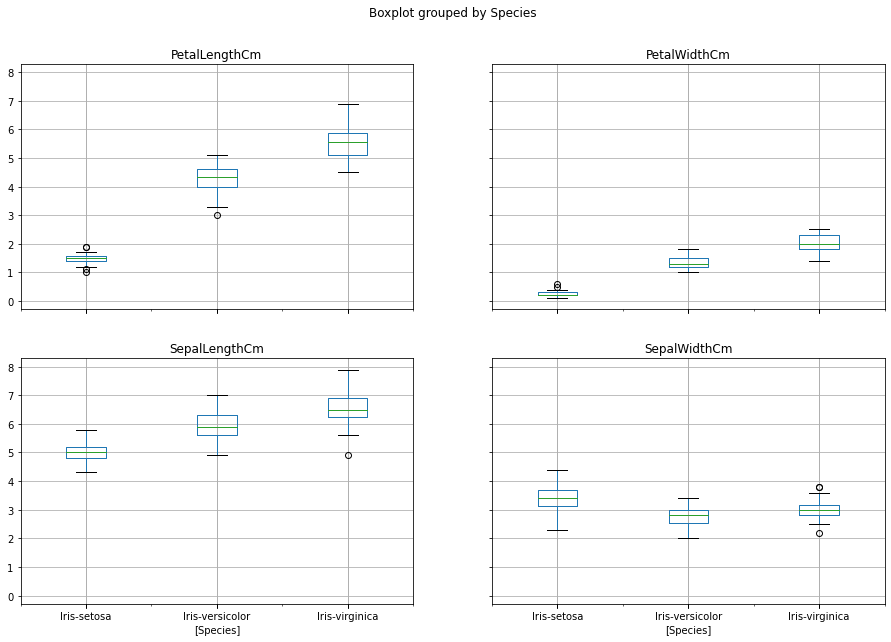

In [14]:
plt.figure()
dataset.drop("Id", axis=1).boxplot(by="Species", figsize=(15, 10))
plt.show()

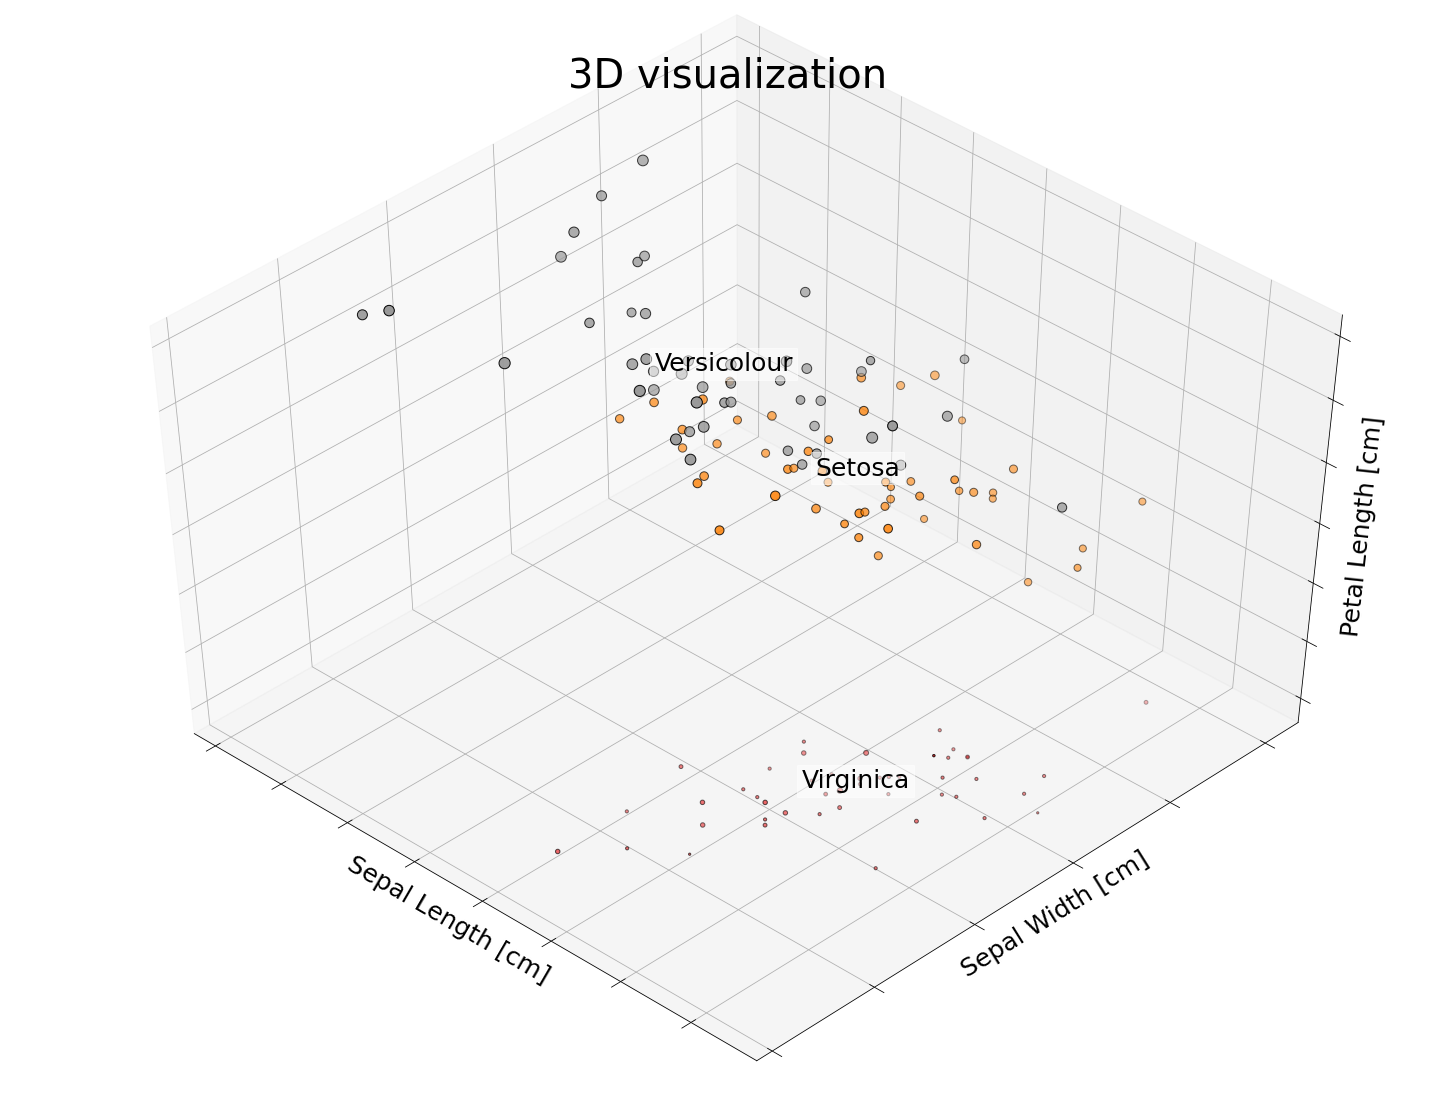

In [15]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(20, 15))
ax = Axes3D(fig, elev=48, azim=134)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s = X[:, 3]*50)

for name, label in [('Virginica', 0), ('Setosa', 1), ('Versicolour', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean(),
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'),size=25)

ax.set_title("3D visualization", fontsize=40)
ax.set_xlabel("Sepal Length [cm]", fontsize=25)
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Sepal Width [cm]", fontsize=25)
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Petal Length [cm]", fontsize=25)
ax.w_zaxis.set_ticklabels([])

plt.show()


In [16]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [17]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

In [20]:
def euclidianDistance(data1, data2, length):
    distance = 0
    for x in range(length):
        distance += np.square(data1[x] - data2[x])
       
    return np.sqrt(distance)
def knn(trainingSet, testInstance, k):
 
    distances = {}
    sort = {}

length = testInstance.shape[1]
print(length)
    
    
    # Calculating euclidean distance between each row of training data and test data
    for x in range(len(trainingSet)):
        
       
        dist = euclidianDistance(testInstance, trainingSet.iloc[x], length)
distances[x] = dist[0]
       
 
    
    # Sorting them on the basis of distance
    sorted_d = sorted(distances.items(), key=operator.itemgetter(1)) #by using it we store indices also
    sorted_d1 = sorted(distances.items())
    print(sorted_d[:5])
    print(sorted_d1[:5])
   
 
    neighbors = []
    
    
    # Extracting top k neighbors
    for x in range(k):
        neighbors.append(sorted_d[x][0])
counts = {"Iris-setosa":0,"Iris-versicolor":0,"Iris-virginica":0}
    
    
    # Calculating the most freq class in the neighbors
    for x in range(len(neighbors)):
        response = trainingSet.iloc[neighbors[x]][-1]
 
        if response in counts:
            counts[response] += 1
        else:
            counts[response] = 1
  
    print(counts)
    sortedVotes = sorted(counts.items(), key=operator.itemgetter(1), reverse=True)
    print(sortedVotes)
    return(sortedVotes[0][0], neighbors)

IndentationError: unexpected indent (<ipython-input-20-3ad59074ff9d>, line 17)

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 576x576 with 0 Axes>

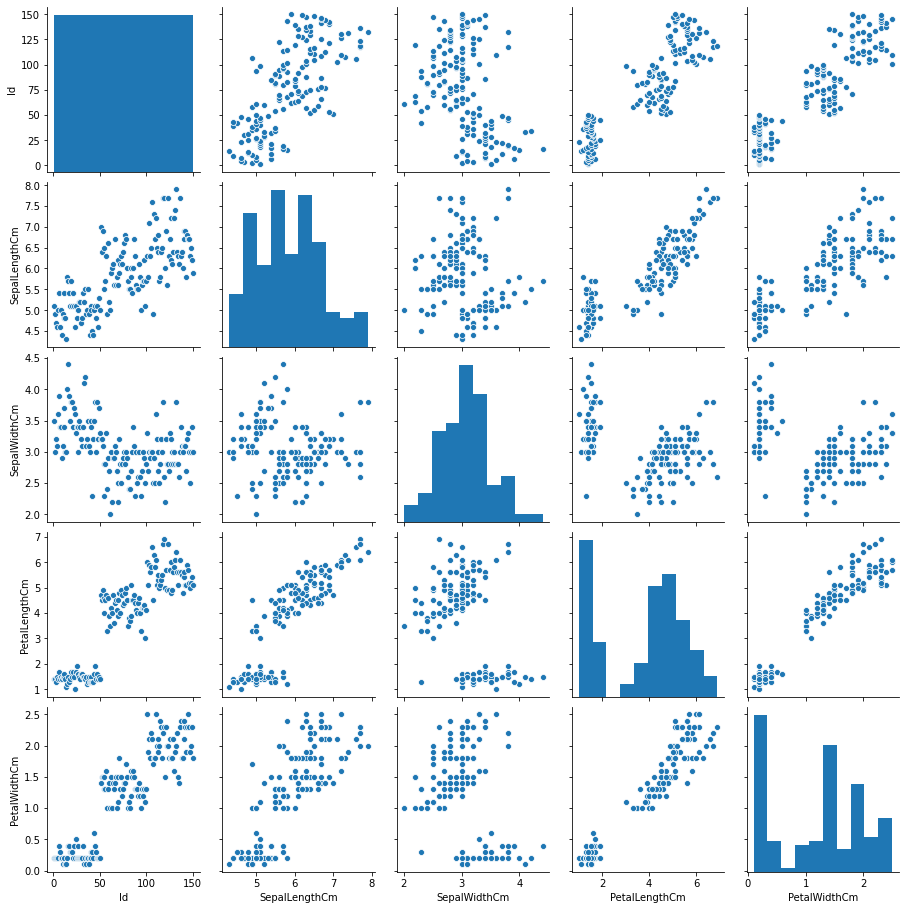

In [23]:
plt.figure(figsize =(8,8))
sns.pairplot(dataset)

In [27]:
iris_data = pd.read_csv('Iris.csv')
iris_data.info()
X = iris_data.iloc[:,1:5].copy()
Y = iris_data.iloc[:,5].copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Feature Scaling

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


KNN Classifier

In [30]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier 
grid = GridSearchCV(KNeighborsClassifier(),param_grid={'n_neighbors':list(range(1,51,2))}, cv=10,scoring='accuracy',return_train_score=False)

KNeighborsClassifier(n_neighbors=15)


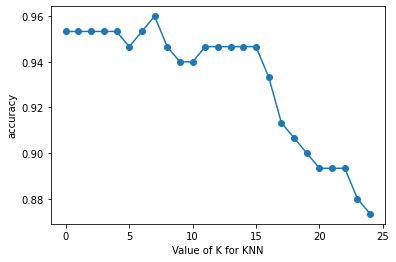

In [31]:
grid.fit(X,Y)
plt.plot(grid.cv_results_['mean_test_score'],marker='o')
plt.xlabel('Value of K for KNN')
plt.ylabel('accuracy')
print(grid.best_estimator_)
# Every dot represents odd k value

In [32]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state = 24)
model = KNeighborsClassifier(n_neighbors=15)
model.fit(X_train,Y_train)

predictions = model.predict(X_test)
predictions

array([2, 2, 1, 1, 2, 0, 0, 1, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 1, 2, 0, 2, 2, 0, 2, 1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 0, 0,
       1])

Accuracy is 98 percent

In [33]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.92      1.00      0.96        12
           2       1.00      0.94      0.97        18

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

